In [1]:
from sklearn import linear_model

%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 

### Helper methods

In [2]:
def polynomial_function(x_values, exponentation_level, exp_min, exp_max, function_param_min, function_param_max):
    exponentation_level = exponentation_level
    function_parameters = list()
    
    for i in range(1, exponentation_level + 1):
        function_parameters.append((np.random.uniform(function_param_min, function_param_max), i))
    
    y_values = list()
    for x in x_values:
        y = 0
        for parameter in function_parameters:
            y += parameter[0] * np.power(x, parameter[1])
        y_values.append(y)
        
    return y_values

In [3]:
def generate_values_in_range(samples_num, min_val, max_val):
    values = list()
    for i in range(0, samples_num):
        values.append(np.random.uniform(min_val, max_val))
    return values    

In [4]:
def add_noise(values):
    noised_values = list()
    for val in values:
        noised_val = val + np.max(values) * np.random.uniform(-0.1, 0.1)
        noised_values.append(noised_val)
    
    return noised_values

In [5]:
def generate_polynomial_regression_problem(samples_num, exponentation_level):
    x_values = generate_values_in_range(samples_num, -5, 5)
    y_values = polynomial_function(x_values, exponentation_level, 2, 6, -5 , 5)
    y_values = add_noise(y_values)
    return np.array(x_values).reshape(-1, 1), np.array((y_values)).reshape(-1, 1)

### Generate problem

In [6]:
samples_num = 100
exponentation_level = 3

In [7]:
x_values, y_values = generate_polynomial_regression_problem(samples_num, exponentation_level)

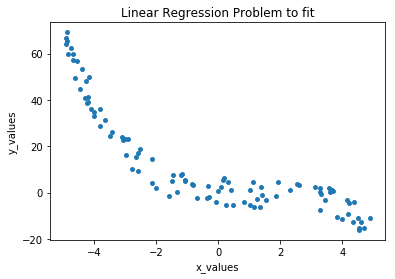

In [8]:
# Presenting generated data
plt.scatter(x_values, y_values, s=15)
plt.title("Linear Regression Problem to fit")
plt.xlabel("x_values")
plt.ylabel("y_values")
plt.show()

### Sklearn solution

In [9]:
# Stacking x values
exp_one_x_values = x_values
exp_two_x_values = x_values ** 2
exp_three_x_values = x_values ** 3
X = np.column_stack((exp_one_x_values, exp_two_x_values, exp_three_x_values))

# Specifying ideal outputs
Y = y_values

In [10]:
# Creating model
linear_regression = linear_model.LinearRegression()

# Training model
linear_regression.fit(X, Y)

/Users/F1sherKK/.pyenv/versions/3.6.1/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Learned coefficients
print("Coefficients intercept:\n " + str(linear_regression.intercept_))
print("Coefficients coef:\n " + str(linear_regression.coef_))

Coefficients intercept:
 [ 0.20638871]
Coefficients coef:
 [[-0.34711985  0.99797303 -0.32133903]]


In [12]:
# Error - Mean Squared Errors
print("Minimized error value: " + str(np.mean((linear_regression.predict(X) - y_values) ** 2)))

Minimized error value: 15.8319741182


In [13]:
def hypothesis(x, intercept, coef):
    return intercept[0] + coef[0][0] * x + coef[0][1] * x ** 2 + coef[0][2] * x ** 3

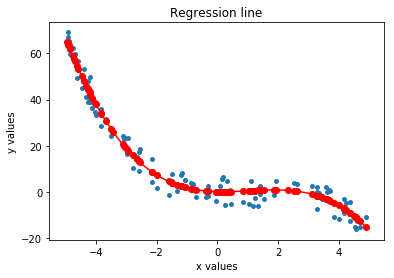

In [14]:
# Displaying dataset
plt.scatter(x_values, y_values, s=15)

# Displaying aproximated function
min_x = np.min(x_values)
max_x = np.max(x_values)
function_x = np.arange(min_x, max_x, 0.01)
function_y = [hypothesis(x, linear_regression.intercept_, linear_regression.coef_) for x in function_x]
plt.plot(function_x, function_y, c="red")

# Displaying predicted values
y_predicted = linear_regression.predict(X)
plt.scatter(x_values, y_predicted, c='red')

plt.title("Regression line")
plt.ylabel("y values")
plt.xlabel("x values")
plt.show()